In [58]:
%matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
from sqlalchemy import func

In [59]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [60]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [62]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [63]:
inspector = inspect(engine)
columns_mt = inspector.get_columns('measurement')
for c in columns_mt:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [64]:
date_last = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_last

('2017-08-23')

In [65]:
#last 12 months 2016-08-23 throu 2017-08-23
dates_12 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
dates_12

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [66]:
ppt_df = pd.DataFrame(dates_12)
ppt_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [67]:
#set index date
ppt_index = ppt_df.set_index("date")
ppt_index = ppt_index.dropna()
ppt_index.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


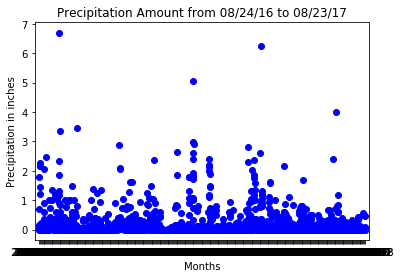

In [68]:
#plot x=date, y=prcp (make pretty)
x_axis = ppt_df["date"]
y_axis = ppt_df["prcp"]
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue",edgecolors="blue")
plt.xlim(-5,370)
plt.title("Precipitation Amount from 08/23/16 to 08/23/17")
plt.xlabel("Months")
plt.ylabel("Precipitation in inches")
plt.show()

In [69]:
ppt_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [70]:
columns_sta = inspector.get_columns('station')
for c in columns_sta:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [71]:
num_station = session.query(Station.station).count()
num_station

9

In [73]:
activity = session.query(Measurement.station,\
    func.count(Measurement.station).label('count'))\
    .group_by(Measurement.station).all()
activity_df = pd.DataFrame(activity)
activity_df.head()
activity_ord = activity_df.sort_values(by=["count"], ascending=False)
activity_ord.head(10)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [74]:
#temp last 12 months
max_act = 'USC00519281'
tobs_12 = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == max_act).all()
tobs_12

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [75]:
tobs_12_df = pd.DataFrame(tobs_12)
tobs_12_df.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


In [79]:
session.query(Station.station, Station.name).\
filter(Station.station == max_act).all()

[('USC00519281', 'WAIHEE 837.5, HI US')]

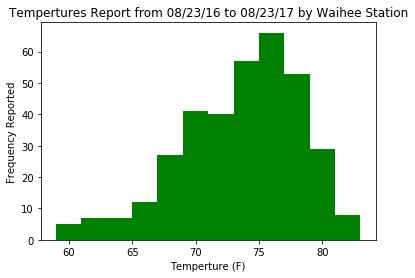

In [86]:
#need grids, labels, legend
x = tobs_12_df["tobs"]
plt.hist(x, bins=12, color = "green")
plt.title("Tempertures Report from 08/23/16 to 08/23/17 by Waihee Station")
plt.xlabel("Temperture (F)")
plt.ylabel("Frequency Reported")
plt.show()